# Fairness Tree Example

## *DRAFT*

Xavier & Francis

Example of the **fairness tree** with the `german-risk-scoring.csv` dataset.

![Fairness Tree](./fairness_tree.png)

## Imports

In [240]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## Data Load

In [2]:
# dataset
data = pd.read_csv('german-risk-scoring.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [3]:
# y
data['Cost Matrix(Risk)'].value_counts()

Good Risk    700
Bad Risk     300
Name: Cost Matrix(Risk), dtype: int64

In [4]:
# Personal status and sex
data["Personal status and sex"].value_counts()

male:single                          548
female:divorced/separated/married    310
male:married/widowed                  92
male:divorced/separated               50
Name: Personal status and sex, dtype: int64

## Data Prep

In [5]:
# create sex column
data["sex"] = data["Personal status and sex"].map(lambda x : x.split(":")[0])

In [6]:
# create X=features, y=target
X = data.drop(columns = 'Cost Matrix(Risk)')
y = data['Cost Matrix(Risk)'].map({"Good Risk": 1, "Bad Risk": 0})

In [7]:
# type modifications

cols_cat = [
    'Status of existing checking account',
    'Credit history',
    'Purpose',
    'Savings account/bonds',
    'Present employment since',
    'Personal status and sex', 
    'Other debtors / guarantors',
    'Property',
    'Other installment plans',
    'Housing',
    'Job',
    'Telephone',
    'foreign worker',
    'sex'
       ]

cols_num = [
    'Duration in month',
    'Credit amount',
    'Installment rate in percentage of disposable income',
    'Present residence since',
    'Age in years',
    'Number of existing credits at this bank',
    'Number of people being liable to provide maintenance for',
    ]

for col in cols_cat:
    data[col] = data[col].astype(str)
    
for col in cols_num:
    data[col] = data[col].astype(float)

cols = cols_cat + cols_num

In [8]:
# unique values of categorical columns

X[cols_cat].nunique()

Status of existing checking account     4
Credit history                          5
Purpose                                10
Savings account/bonds                   5
Present employment since                5
Personal status and sex                 4
Other debtors / guarantors              3
Property                                4
Other installment plans                 3
Housing                                 3
Job                                     4
Telephone                               2
foreign worker                          2
sex                                     2
dtype: int64

In [9]:
# all to numbers

encoder = OneHotEncoder()
X_cat = encoder.fit_transform(X[cols_cat]).toarray()
X_num = X[cols_num]
X_prep = np.concatenate((X_num, X_cat), axis=1)
X_prep.shape

(1000, 63)

In [10]:
# get values list from one hot encoding of categorical data

encoder.get_feature_names(input_features=X[cols_cat].columns)

array(['Status of existing checking account_0 <= <200 DM',
       'Status of existing checking account_<0 DM',
       'Status of existing checking account_>= 200 DM ',
       'Status of existing checking account_no checking account',
       'Credit history_all credits at this bank paid back duly',
       'Credit history_critical account',
       'Credit history_delay in paying off',
       'Credit history_existing credits paid back duly till now',
       'Credit history_no credits taken', 'Purpose_business',
       'Purpose_car (new)', 'Purpose_car (used)',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_others',
       'Purpose_radio/television', 'Purpose_repairs',
       'Purpose_retraining', 'Savings account/bonds_100 <= <500 DM',
       'Savings account/bonds_500 <= < 1000 DM',
       'Savings account/bonds_<100 DM',
       'Savings account/bonds_>= 1000 DM',
       'Savings account/bonds_no savings account',
       'Present

In [11]:
# data prepared

cols = data[cols_num].columns.tolist() + encoder.get_feature_names(input_features=X[cols_cat].columns).tolist()
data_prep = pd.DataFrame(X_prep, columns=cols)
data_prep.shape

(1000, 63)

In [12]:
# data prepared

data_prep.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Status of existing checking account_0 <= <200 DM,Status of existing checking account_<0 DM,Status of existing checking account_>= 200 DM,...,Job_management/ highly qualified employee,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,Telephone_none,Telephone_yes,foreign worker_no,foreign worker_yes,sex_female,sex_male
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


## Machine Learning

In [13]:
# split train test

X_train, X_test, y_train, y_test = train_test_split(data_prep, y, test_size=0.2, random_state=42)
X_train = X_train.copy()
X_test = X_test.copy()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 63) (200, 63) (800,) (200,)


In [14]:
# train model

clf = LogisticRegression(random_state=0, n_jobs=8, max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, n_jobs=8, random_state=0)

In [15]:
# function print_results()

def print_results(y_label, y_pred):
    print("accuracy_score = {:.3f}".format(accuracy_score(y_label, y_pred)))
    print("f1_score = {:.3f}".format(f1_score(y_label, y_pred)))
    print("confusion_matrix:\n", confusion_matrix(y_label, y_pred))

In [16]:
# predict on train set

y_pred = clf.predict(X_train)
print_results(y_train, y_pred)

accuracy_score = 0.775
f1_score = 0.847
confusion_matrix:
 [[122 119]
 [ 61 498]]


In [17]:
# predict on test set

y_pred = clf.predict(X_test)
print_results(y_test, y_pred)

accuracy_score = 0.785
f1_score = 0.853
confusion_matrix:
 [[ 32  27]
 [ 16 125]]


## Fairness Analysis (cf. Aequitas)

*Source*: http://www.datasciencepublicpolicy.org/projects/aequitas/

In [18]:
# select columns to analyse

cols_num_to_analyse = [
#     'Duration in month',
     'Credit amount',
#     'Installment rate in percentage of disposable income',
#     'Present residence since',
     'Age in years',
#     'Number of existing credits at this bank',
#     'Number of people being liable to provide maintenance for',
]

cols_cat_to_analyse = [
#     'Status of existing checking account',
#     'Credit history',
#     'Purpose',
#     'Savings account/bonds',
#     'Present employment since',
#     'Personal status and sex', 
#     'Other debtors / guarantors',
#     'Property',
#     'Other installment plans',
#     'Housing',
#     'Job',
#     'Telephone',
#     'foreign worker',
     'sex',
]

cols_to_analyse = cols_num_to_analyse + cols_cat_to_analyse

# build analysis
analysis = X.loc[X_test.index, cols_to_analyse].copy()
analysis['label'] = y_test
analysis['prediction'] = y_pred

In [19]:
# X_test for analysis

cols_to_analyse_in_X_space = cols_num_to_analyse + [col for col in data_prep.columns for prefix in cols_cat_to_analyse if col.startswith(prefix)]
X_test[cols_to_analyse_in_X_space].head()

,Credit amount,Age in years,sex_female,sex_male
521,3190.0,24.0,1.0,0.0
737,4380.0,35.0,0.0,1.0
740,2325.0,32.0,0.0,1.0
660,1297.0,23.0,0.0,1.0
411,7253.0,35.0,0.0,1.0


In [20]:
# analysis

analysis.head()

,Credit amount,Age in years,sex,label,prediction
521,3190,24,female,0,1
737,4380,35,male,1,0
740,2325,32,male,1,0
660,1297,23,male,1,1
411,7253,35,male,1,1


In [51]:
# add quantiles to cols_num_to_analyse:
for col in cols_num_to_analyse:
    analysis[f'q_{col}'] = pd.qcut(analysis[col], 4)
    
analysis.head()

,Credit amount,Age in years,sex,label,prediction,q_Credit amount,q_Age in years
521,3190,24,female,0,1,"(2223.0, 3528.25]","(19.999, 27.0]"
737,4380,35,male,1,0,"(3528.25, 14896.0]","(33.0, 41.25]"
740,2325,32,male,1,0,"(2223.0, 3528.25]","(27.0, 33.0]"
660,1297,23,male,1,1,"(1292.0, 2223.0]","(19.999, 27.0]"
411,7253,35,male,1,1,"(3528.25, 14896.0]","(33.0, 41.25]"


### False Positive / Group Size Parity (FPR Parity)

*Audit goal*: Ensure all protected groups have the same false positive rates as the reference group. ?

What are your chance being wrongly predicted positive according to your category?

$P(\hat{Y} = 1 \wedge Y = 0 \mid G)$

In [289]:
def show_fpr(col):
    col_to_use = f'q_{col}' if col in cols_num else col
    # number by category
    num = analysis[col_to_use].value_counts().sort_index()
    # a: ŷ = 1 & y = 0
    a = analysis.loc[(analysis['prediction']==1) & (analysis['label']==0), col_to_use].value_counts()
    # b: all
    b = num
    result = a.div(b).sort_index()

    ax = sns.barplot(x=result, y=result.index, color='orange')
    ax.set_title(f'FPR Parity of "{col}"\n'+ r'$P(\hat{y} = 1 \wedge y = 0 \mid ' + col.replace(' ', '\;') + r')$')
    ax.set_xlabel('')
    for i, p in enumerate(ax.patches):
        ax.annotate(f'(Num: {num[i]}), {p.get_width():.2f}', (p.get_width() * 1.01, p.get_y() + 0.5))

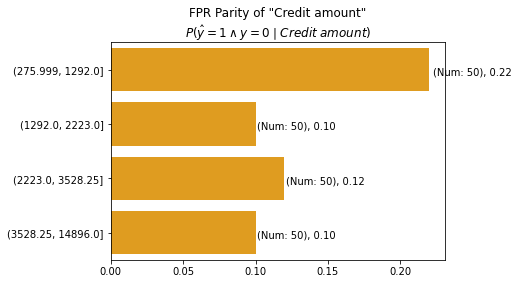

In [290]:
show_fpr('Credit amount')

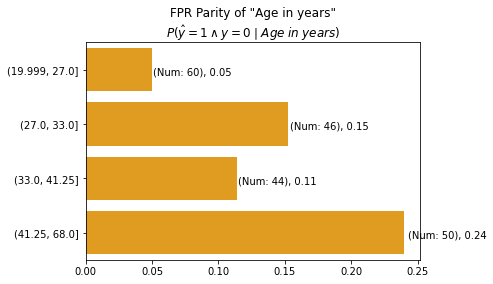

In [265]:
show_fpr('Age in years')

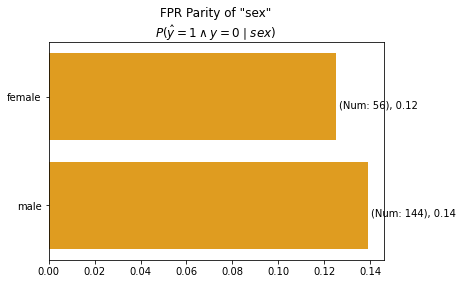

In [266]:
show_fpr('sex')

### False Discovery Rate Parity (FDR Parity)

*Audit goal*: Ensure all protected groups have equally proportional false positives within the selected set.

Among people being predicted positive, what are the chances being wrongly predicted according to your category?

$P(Y = 0 \mid G \wedge \hat{Y} = 1)$

In [287]:
def show_fdr(col):
    col_to_use = f'q_{col}' if col in cols_num else col
    num = analysis[col_to_use].value_counts().sort_index()
    # a : y = 0 & ŷ = 1
    a = analysis.loc[(analysis['label']==0) & (analysis['prediction']==1), col_to_use].value_counts()
    # b : ŷ = 1
    b = analysis.loc[(analysis['prediction']==1), col_to_use].value_counts()
    result = a.div(b).sort_index()
    
    ax = sns.barplot(x=result, y=result.index, color='orange')
    ax.set_title(f'FDR Parity of "{col}"\n'+ r'$P(y = 0 \mid ' + col.replace(' ', '\;') + r' \wedge \hat{y} = 1)$')
    ax.set_xlabel('')
    for i, p in enumerate(ax.patches):
        ax.annotate(f'(Num: {num[i]}), {p.get_width():.2f}', (p.get_width() * 1.01, p.get_y() + 0.5))

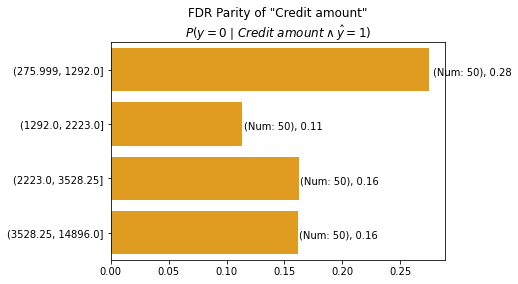

In [288]:
show_fdr('Credit amount')

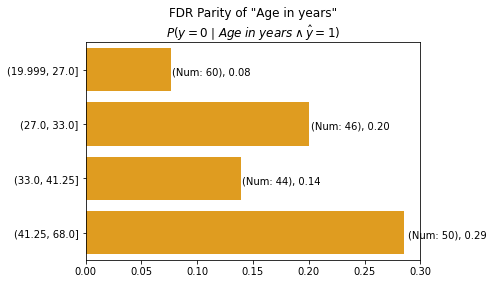

In [271]:
show_fdr('Age in years')

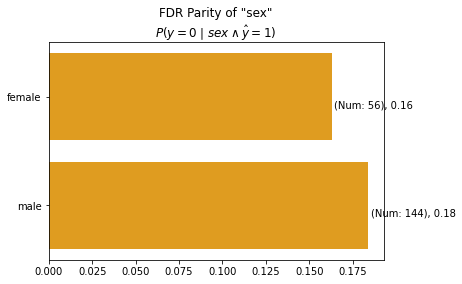

In [272]:
show_fdr('sex')

### False Positive Rate Parity (FPR Parity)

*Audit goal*: Ensure all protected groups have the same false positive rates (as the reference group).

Among people being negative, what are the chances being wrongly predicted according to your category?

$P(\hat{Y} = 1 \mid G, Y = 0)$

In [291]:
def show_fpr(col):
    col_to_use = f'q_{col}' if col in cols_num else col
    num = analysis[col_to_use].value_counts().sort_index()
    # a : ŷ = 1 & y = 0
    a = analysis.loc[(analysis['prediction']==1) & (analysis['label']==0), col_to_use].value_counts()
    # b : ŷ = 1
    b = analysis.loc[(analysis['label']==0), col_to_use].value_counts()
    result = a.div(b).sort_index()
    
    ax = sns.barplot(x=result, y=result.index, color='orange')
    ax.set_title(f'FDR Parity of "{col}"\n'+ r'$P(y = 0 \mid ' + col.replace(' ', '\;') + r' \wedge \hat{y} = 1)$')
    ax.set_xlabel('')
    for i, p in enumerate(ax.patches):
        ax.annotate(f'(Num: {num[i]}), {p.get_width():.2f}', (p.get_width() * 1.01, p.get_y() + 0.5))

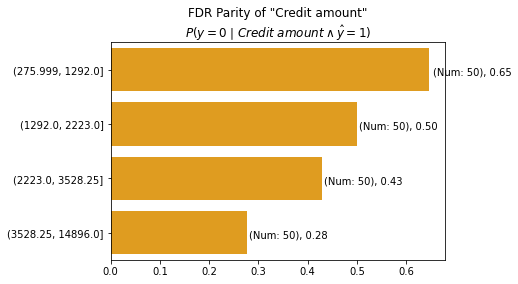

In [292]:
show_fpr('Credit amount')

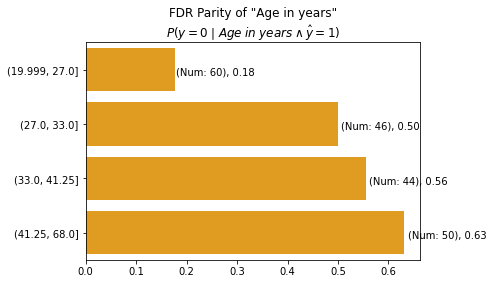

In [293]:
show_fpr('Age in years')

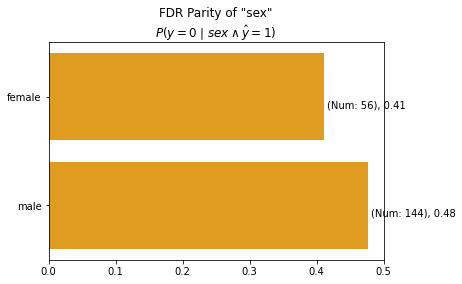

In [294]:
show_fpr('sex')

### Recall (or True Positive Rate Parity)

Among people being positive, what are the chances being correctly predicted according to your category?

$P(\hat{Y} = 1 \mid G, Y = 1)$

### False Negative / Group Size Parity

What are your chance being wrongly predicted negative according to your category?

$P(\hat{Y} = 0, Y = 1 \mid G)$

### False Omission Rate Parity (FOR Parity)

Among people being positive, what are the chances being wrongly predicted according to your category?

$P(Y = 1 \mid G, \hat{Y} = 0)$

In [299]:
def show_for(col):
    col_to_use = f'q_{col}' if col in cols_num else col
    num = analysis[col_to_use].value_counts().sort_index()
    # a : ŷ = 0 & y = 1
    a = analysis.loc[(analysis['prediction']==0) & (analysis['label']==1), col_to_use].value_counts()
    # b : ŷ = 0
    b = analysis.loc[(analysis['prediction']==0), col_to_use].value_counts()
    result = a.div(b).sort_index()
    
    ax = sns.barplot(x=result, y=result.index, color='orange')
    ax.set_title(f'FOR Parity of "{col}"\n'+ r'$P(y = 1 \mid ' + col.replace(' ', '\;') + r' \wedge \hat{y} = 0)$')
    ax.set_xlabel('')
    for i, p in enumerate(ax.patches):
        ax.annotate(f'(Num: {num[i]}), {p.get_width():.2f}', (p.get_width() * 1.01, p.get_y() + 0.5))

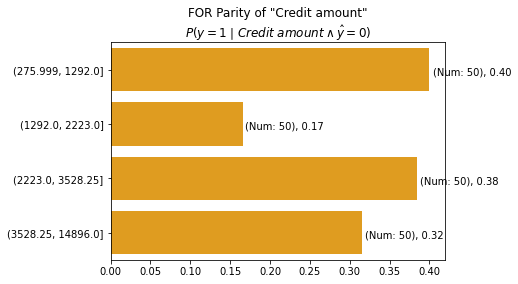

In [300]:
show_for('Credit amount')

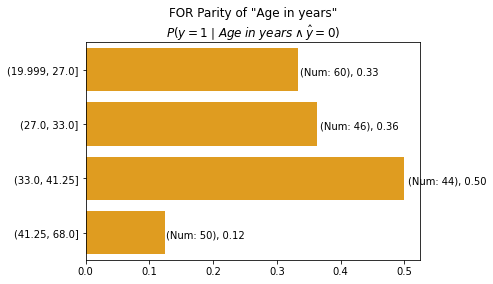

In [301]:
show_for('Age in years')

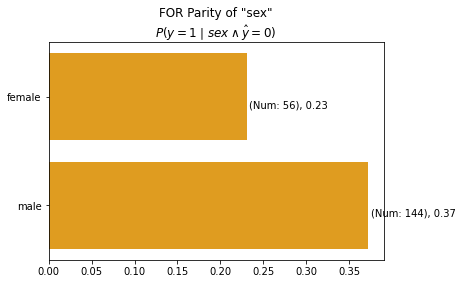

In [302]:
show_for('sex')

### False Negative Rate Parity (FNR Parity)

*Audit goal*: Ensure all protected groups have the same false negative rates (as the reference group).

Among people being positive, what are the chances being wrongly predicted according to your category?

$P(\hat{Y} = 0 \mid G, Y = 1)$

In [283]:
def show_fnr(col):
    col_to_use = f'q_{col}' if col in cols_num else col
    num = analysis[col_to_use].value_counts().sort_index()
    # a : ŷ = 1 & y = 0
    a = analysis.loc[(analysis['prediction']==0) & (analysis['label']==1), col_to_use].value_counts()
    # b : ŷ = 1
    b = analysis.loc[(analysis['label']==1), col_to_use].value_counts()
    result = a.div(b).sort_index()
    
    ax = sns.barplot(x=result, y=result.index, color='orange')
    ax.set_title(f'FNR Parity of "{col}"\n'+ r'$P(\hat{y} = 0 \mid ' + col.replace(' ', '\;') + r' \wedge y = 1)$')
    ax.set_xlabel('')
    for i, p in enumerate(ax.patches):
        ax.annotate(f'(Num: {num[i]}), {p.get_width():.2f}', (p.get_width() * 1.01, p.get_y() + 0.5))

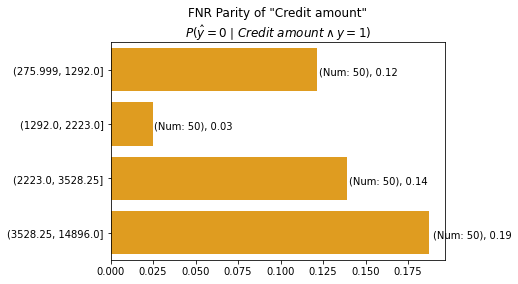

In [284]:
show_fnr('Credit amount')

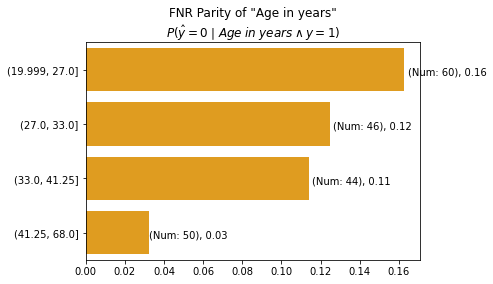

In [281]:
show_fnr('Age in years')

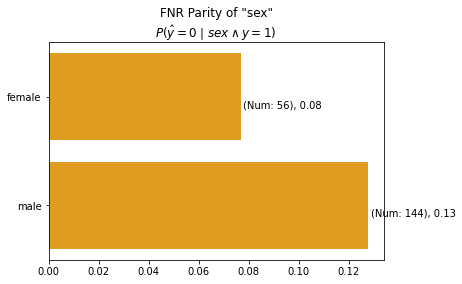

In [282]:
show_fnr('sex')